In [16]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
from matplotlib.patches import Rectangle

import stumpy
import matrixprofile as mp

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import ast

# Reading DF from .csv

In [17]:
daily_stats = pd.read_csv('daily_stats_user.csv', lineterminator='\n', index_col=0)

### Converting str time series into array

In [18]:
daily_stats['success_ts'] = daily_stats.success_ts.apply(ast.literal_eval)

##### TSs formatting

In [19]:
X_bot = []
X_nonbot = []
for row in daily_stats.itertuples():
    if row.bot == 1:
        X_bot.append(row.success_ts)
    else:
        X_nonbot.append(row.success_ts)
X_bot = np.array(X_bot)
X_nonbot = np.array(X_nonbot)
X = np.concatenate((X_bot, X_nonbot))

#### Avg success of the twits posted by all Twitter's users on the platform per day

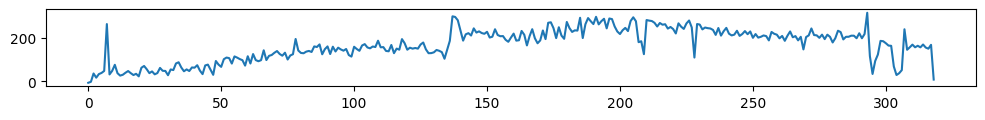

In [20]:
avg = [0]*319
for lst in X:
    for i in range(0,len(lst)):
        avg[i] = avg[i] + lst[i]
avg = [el/319 for el in avg]

plt.figure(figsize=(12,1))
plt.plot(avg)
plt.show()

# Weekly motif discovery (ALL)

[<Figure size 1500x700 with 5 Axes>,
 <Figure size 1500x700 with 8 Axes>,
 <Figure size 1500x700 with 4 Axes>]

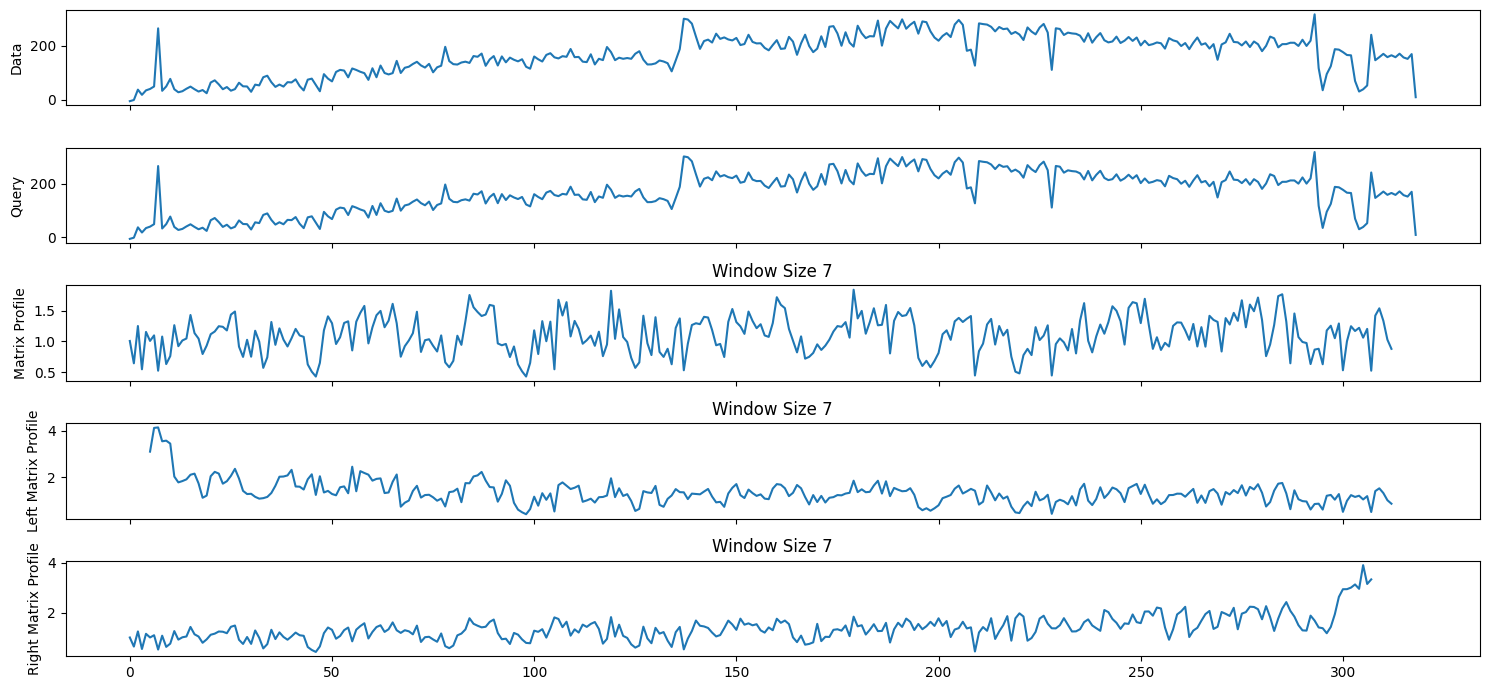

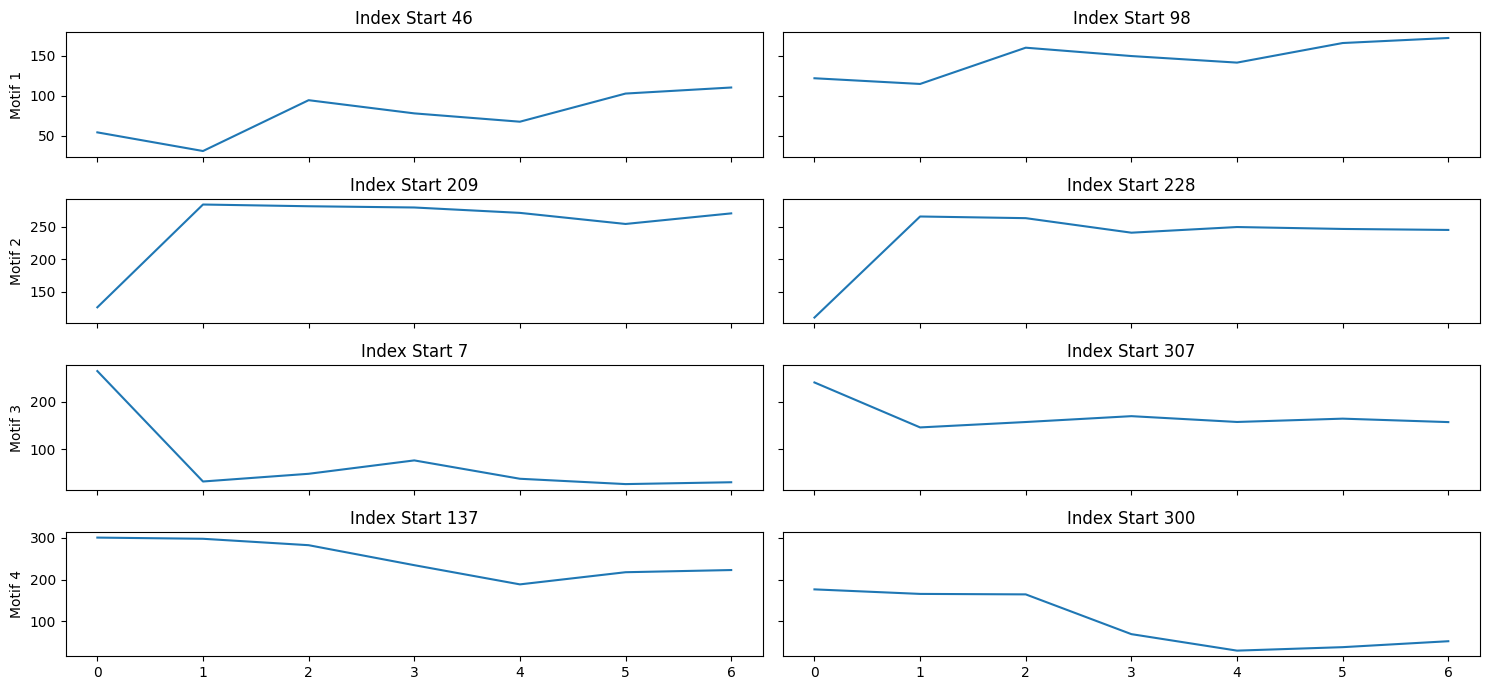

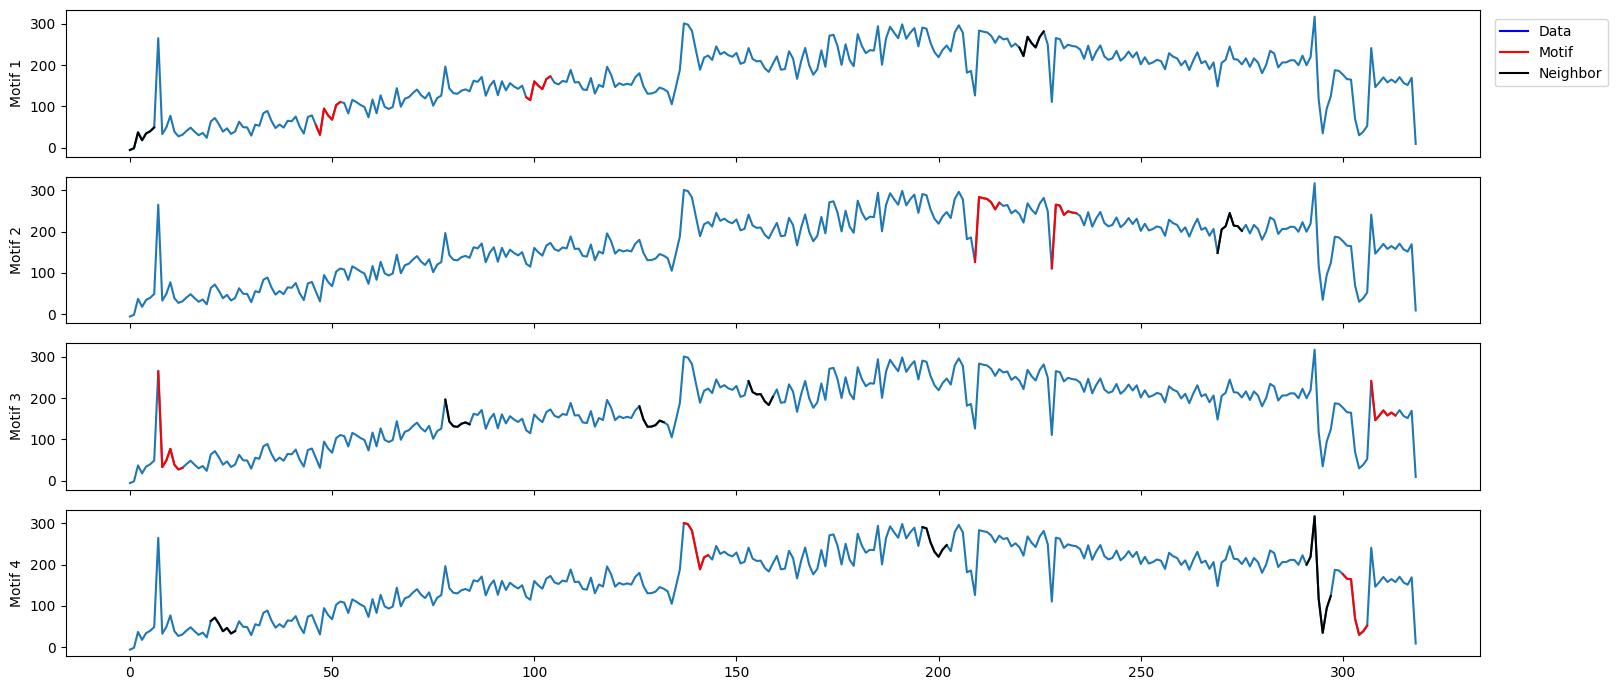

In [21]:
window_size = 7
profile = mp.algorithms.stomp(avg, window_size)
motif = mp.discover.motifs(profile, k=4, max_neighbors=3)
mp.visualize(motif)

# Montly motif discovery (ALL)

[<Figure size 1500x700 with 5 Axes>,
 <Figure size 1500x700 with 8 Axes>,
 <Figure size 1500x700 with 4 Axes>]

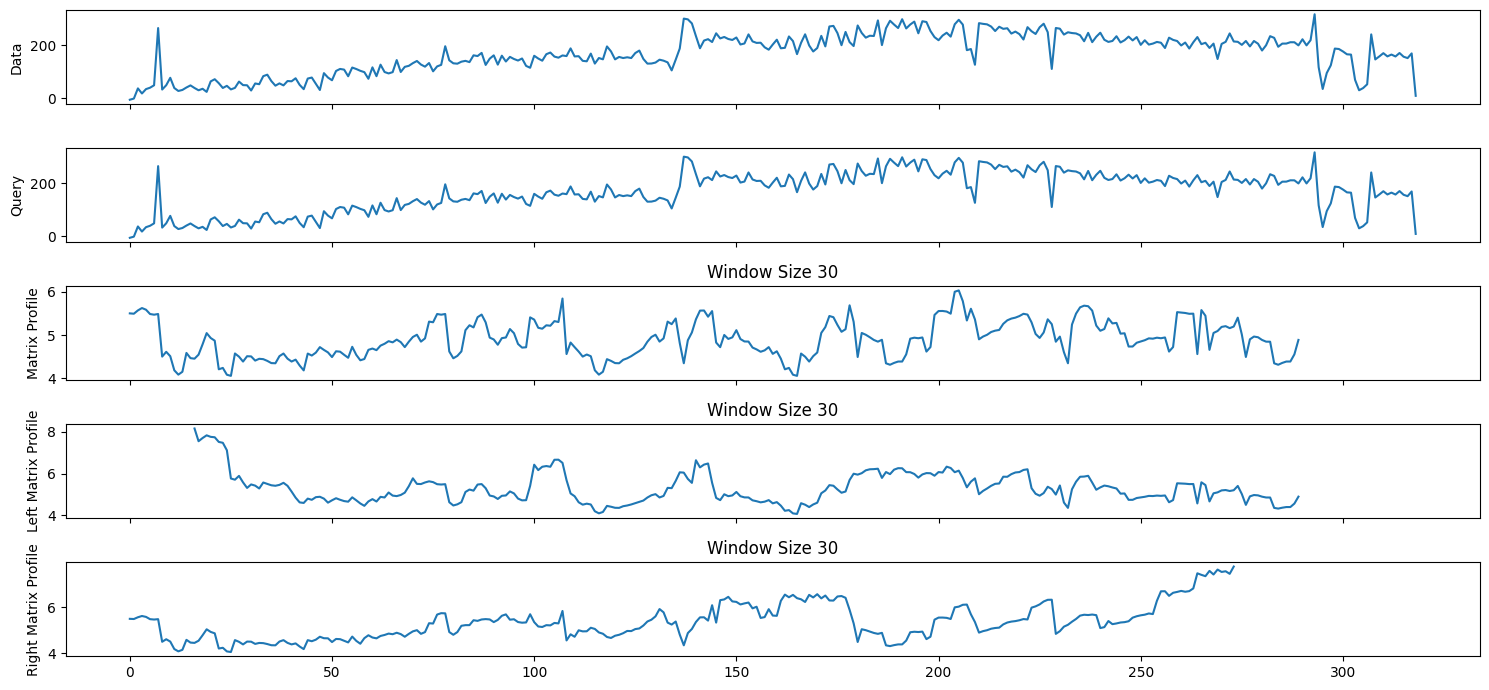

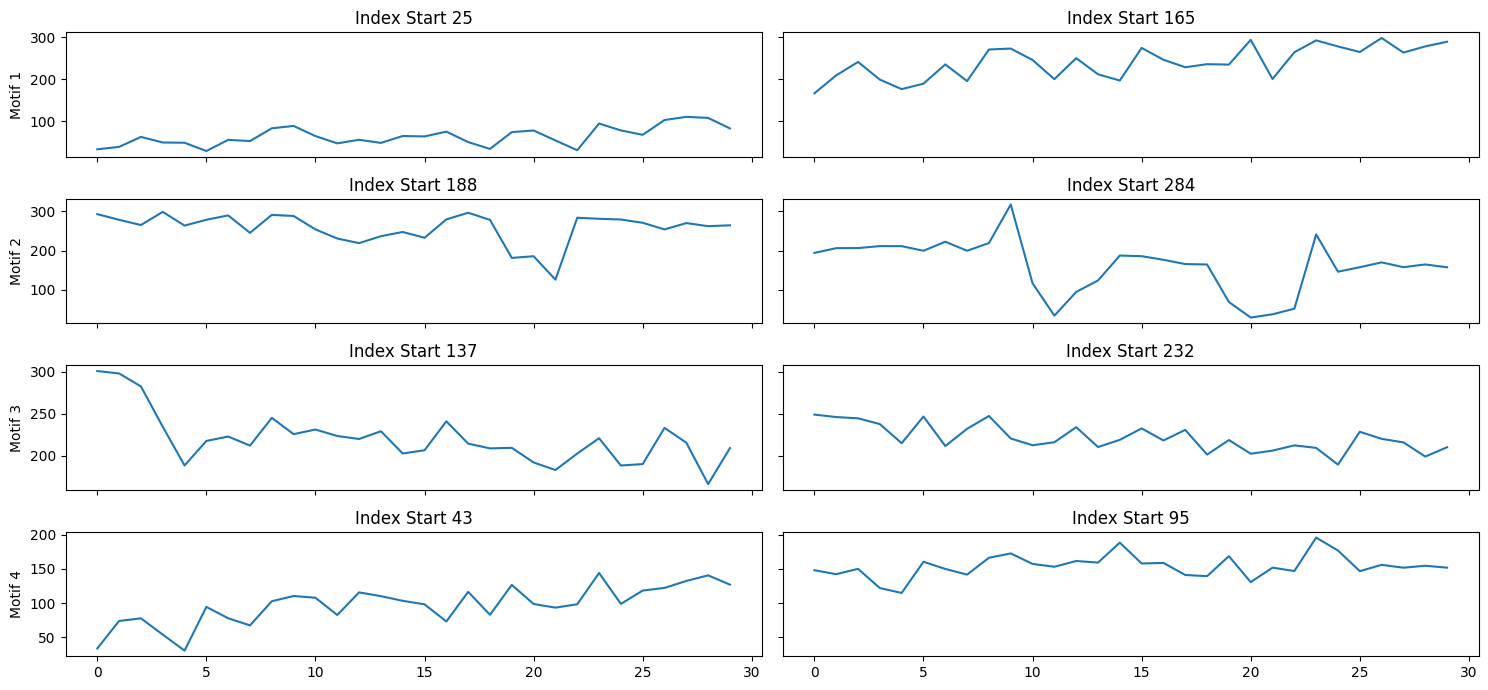

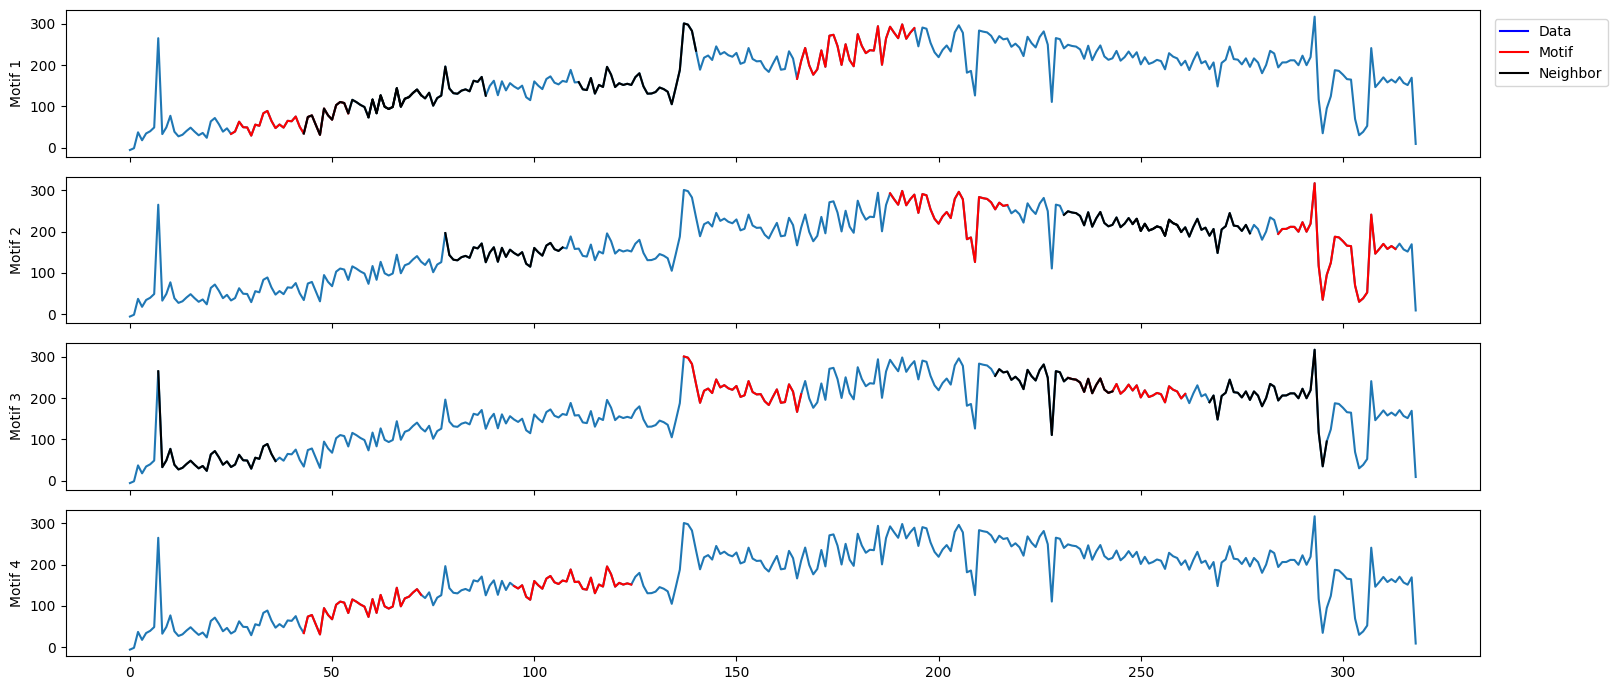

In [22]:
window_size = 30
profile = mp.algorithms.stomp(avg, window_size)
motif = mp.discover.motifs(profile, k=4, max_neighbors=3)
mp.visualize(motif)

#### Avg success of the twits posted by Twitter's BOTS on the platform per day

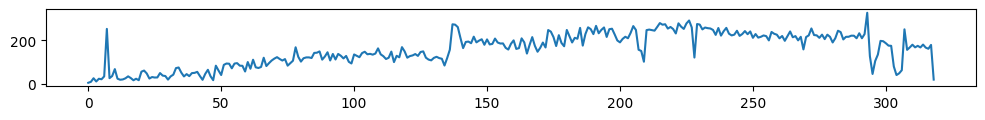

In [23]:
avg_bot = [0]*319
for lst in X_bot:
    for i in range(0,len(lst)):
        avg_bot[i] = avg_bot[i] + lst[i]
avg_bot = [el/319 for el in avg_bot]

plt.figure(figsize=(12,1))
plt.plot(avg_bot)
plt.show()

# Weekly motif discovery (BOTS)

[<Figure size 1500x700 with 5 Axes>,
 <Figure size 1500x700 with 8 Axes>,
 <Figure size 1500x700 with 4 Axes>]

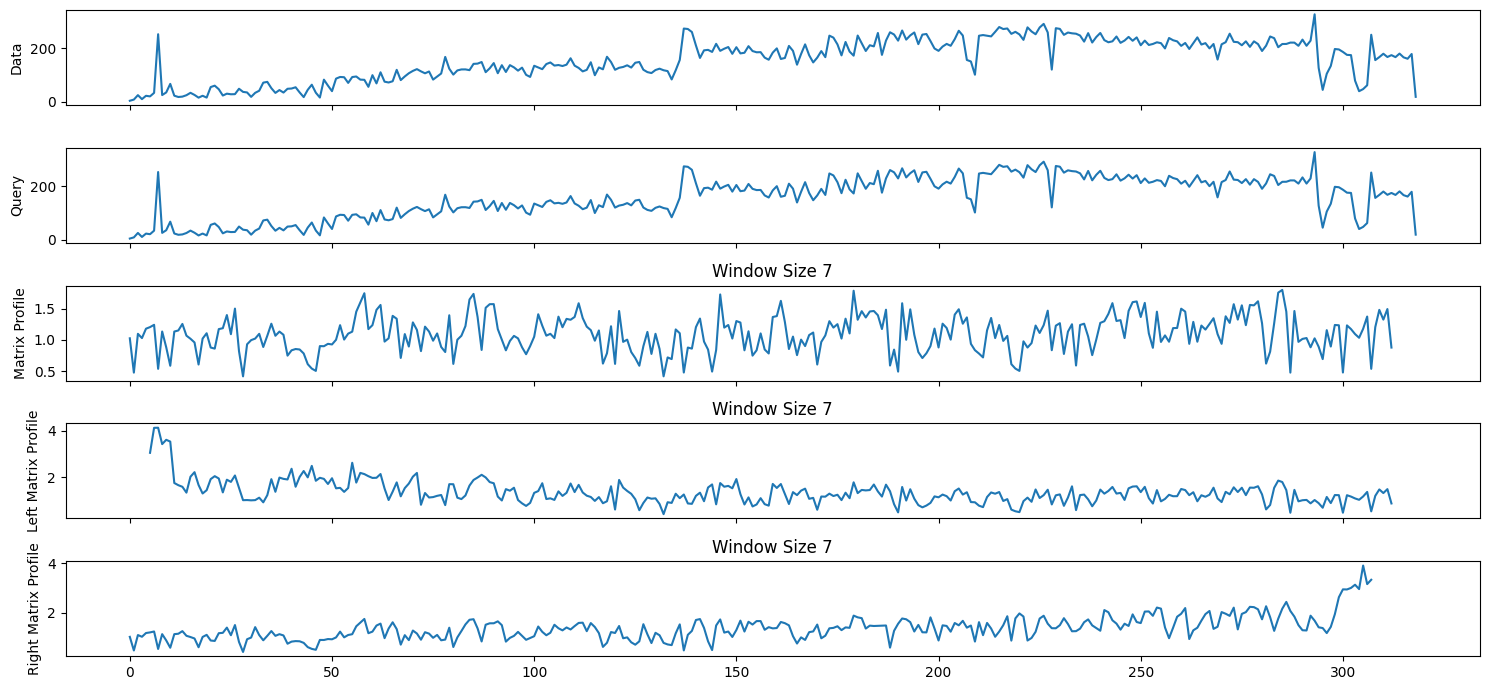

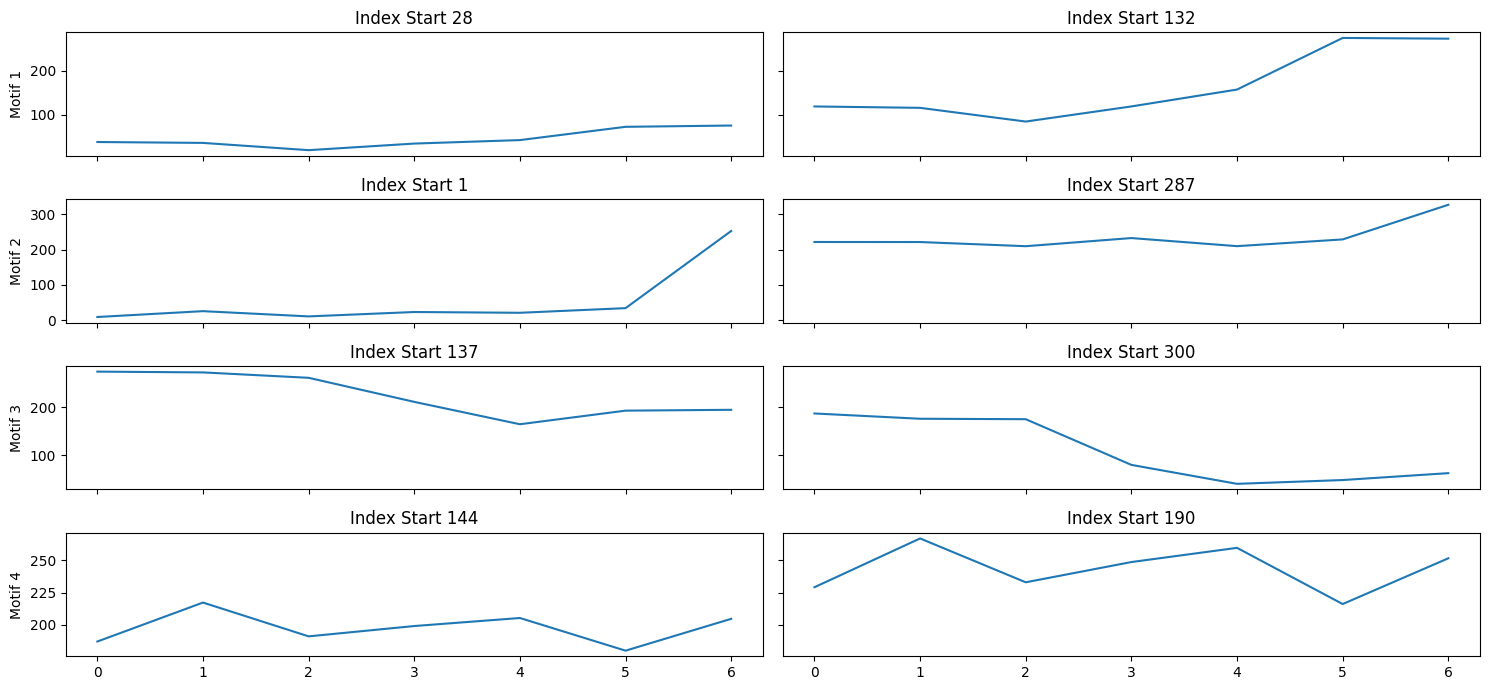

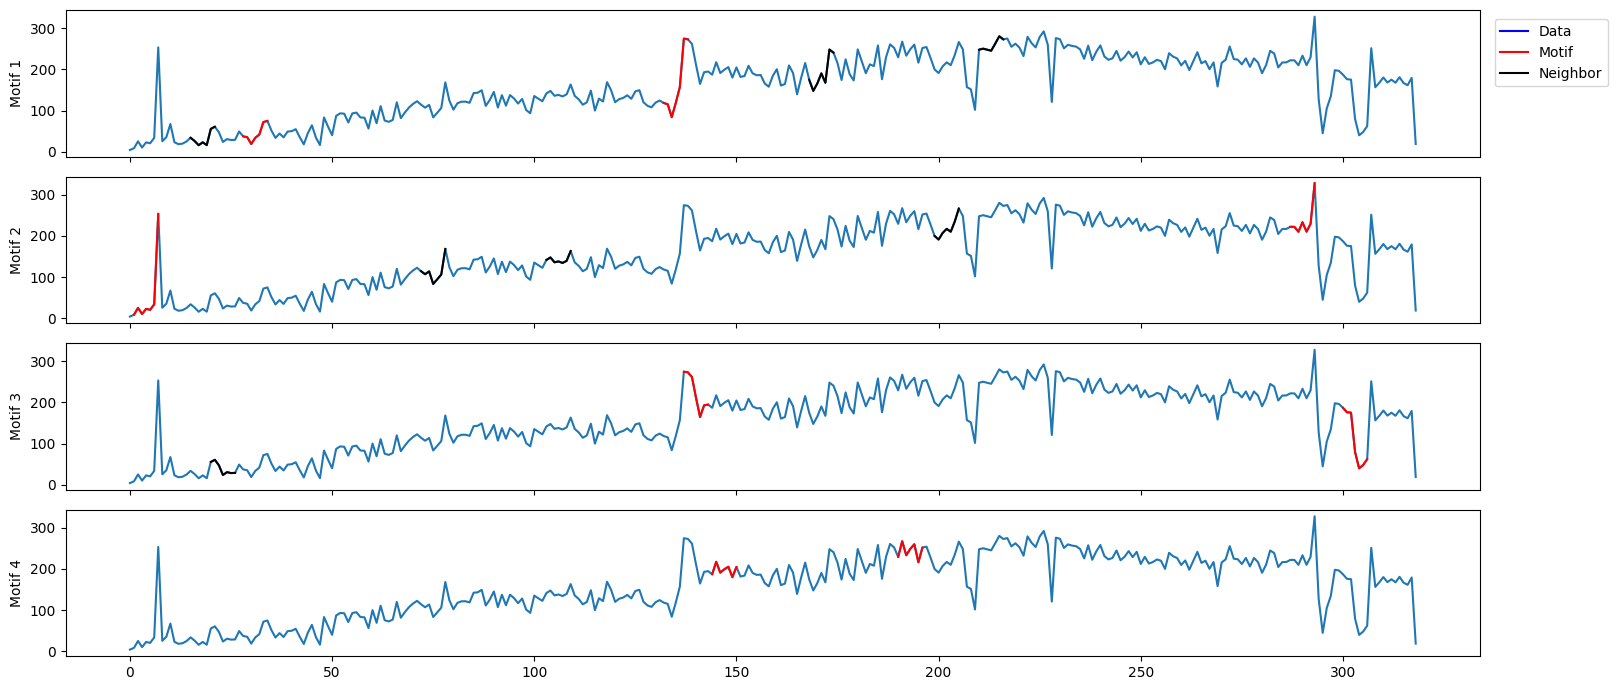

In [24]:
window_size = 7
profile = mp.algorithms.stomp(avg_bot, window_size)
motif = mp.discover.motifs(profile, k=4, max_neighbors=3)
mp.visualize(motif)

# Montly motif discovery (BOTS)

[<Figure size 1500x700 with 5 Axes>,
 <Figure size 1500x700 with 8 Axes>,
 <Figure size 1500x700 with 4 Axes>]

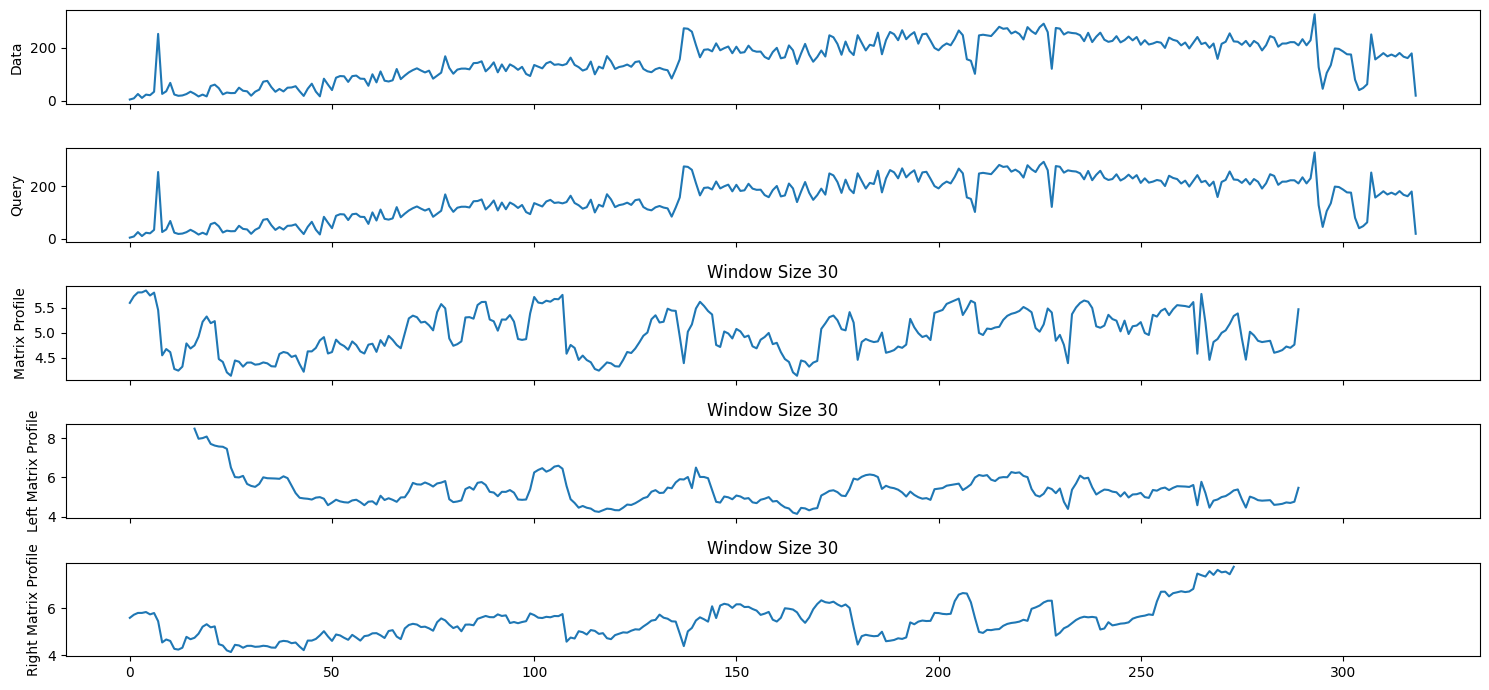

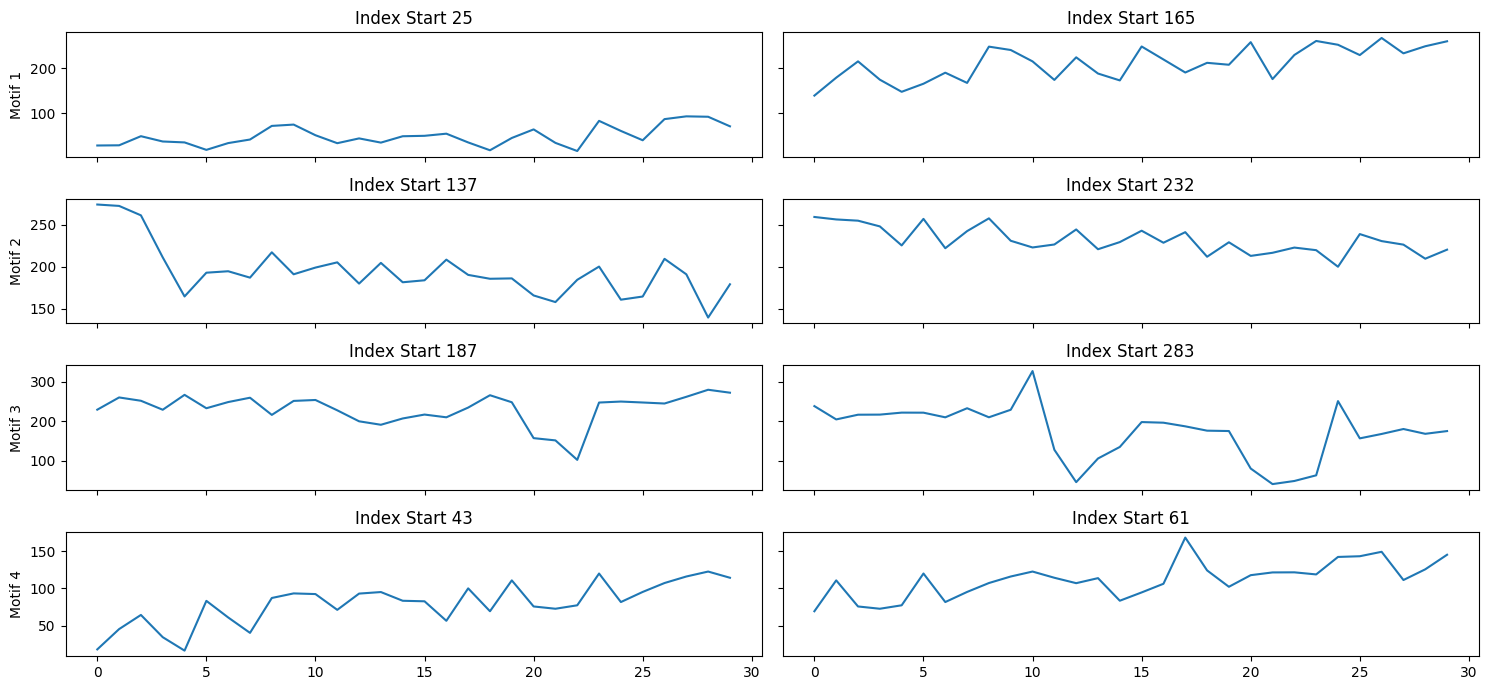

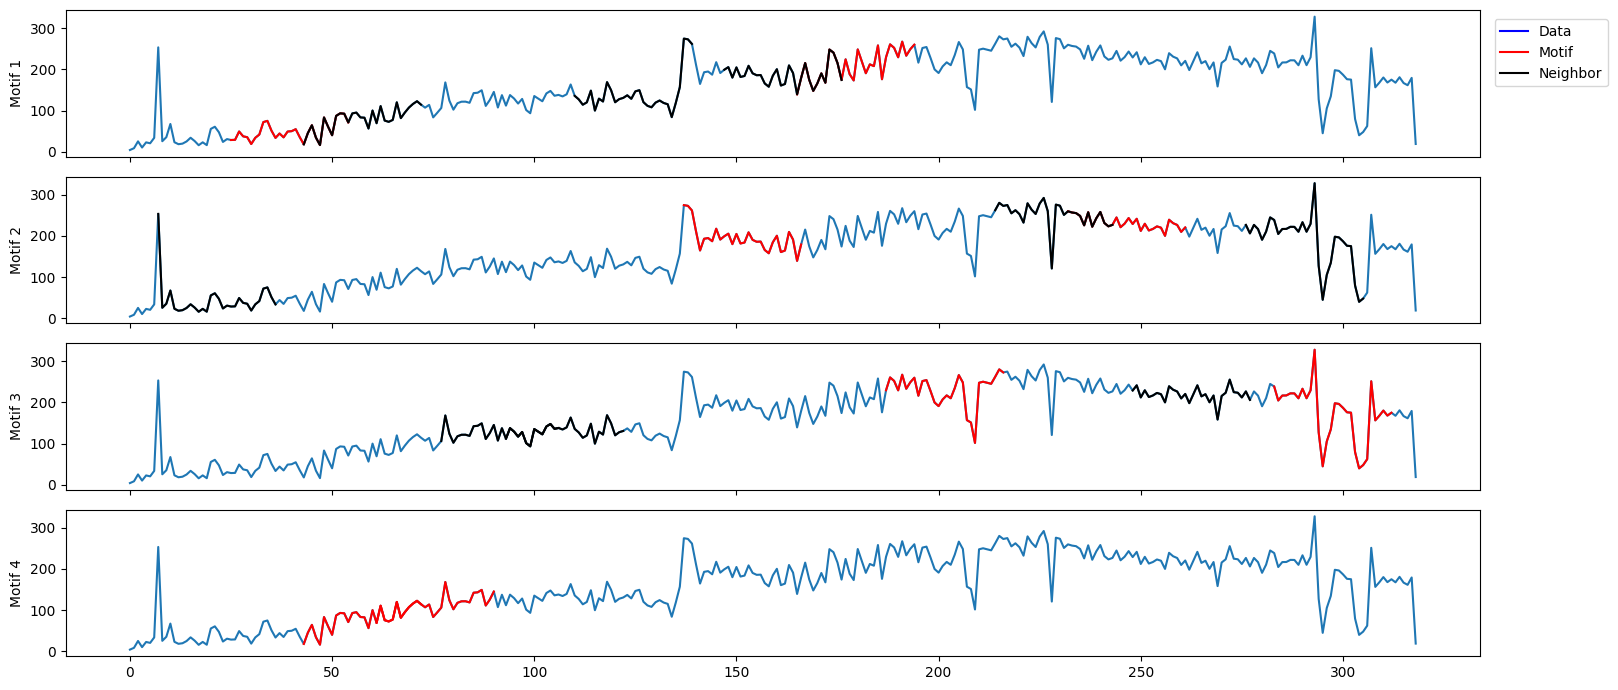

In [25]:
window_size = 30
profile = mp.algorithms.stomp(avg_bot, window_size)
motif = mp.discover.motifs(profile, k=4, max_neighbors=3)
mp.visualize(motif)

#### Avg success of the twits posted by Twitter's REAL USERS on the platform per day

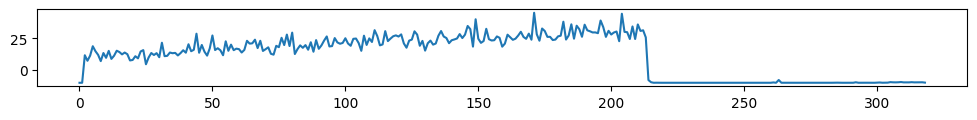

In [26]:
avg_nonbot = [0]*319
for lst in X_nonbot:
    for i in range(0,len(lst)):
        avg_nonbot[i] = avg_nonbot[i] + lst[i]
avg_nonbot = [el/319 for el in avg_nonbot]

plt.figure(figsize=(12,1))
plt.plot(avg_nonbot)
plt.show()

# Weekly motif discovery (BOTS)

[<Figure size 1500x700 with 5 Axes>,
 <Figure size 1500x700 with 8 Axes>,
 <Figure size 1500x700 with 4 Axes>]

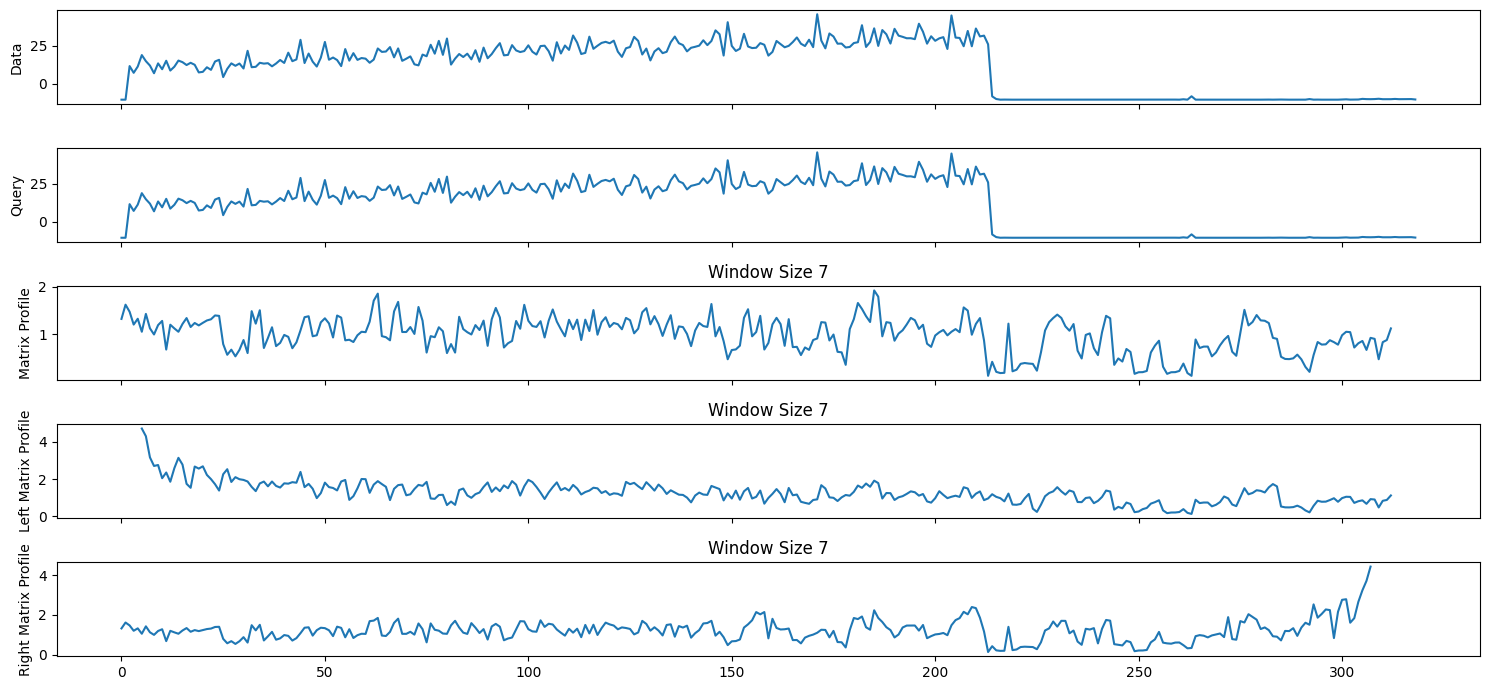

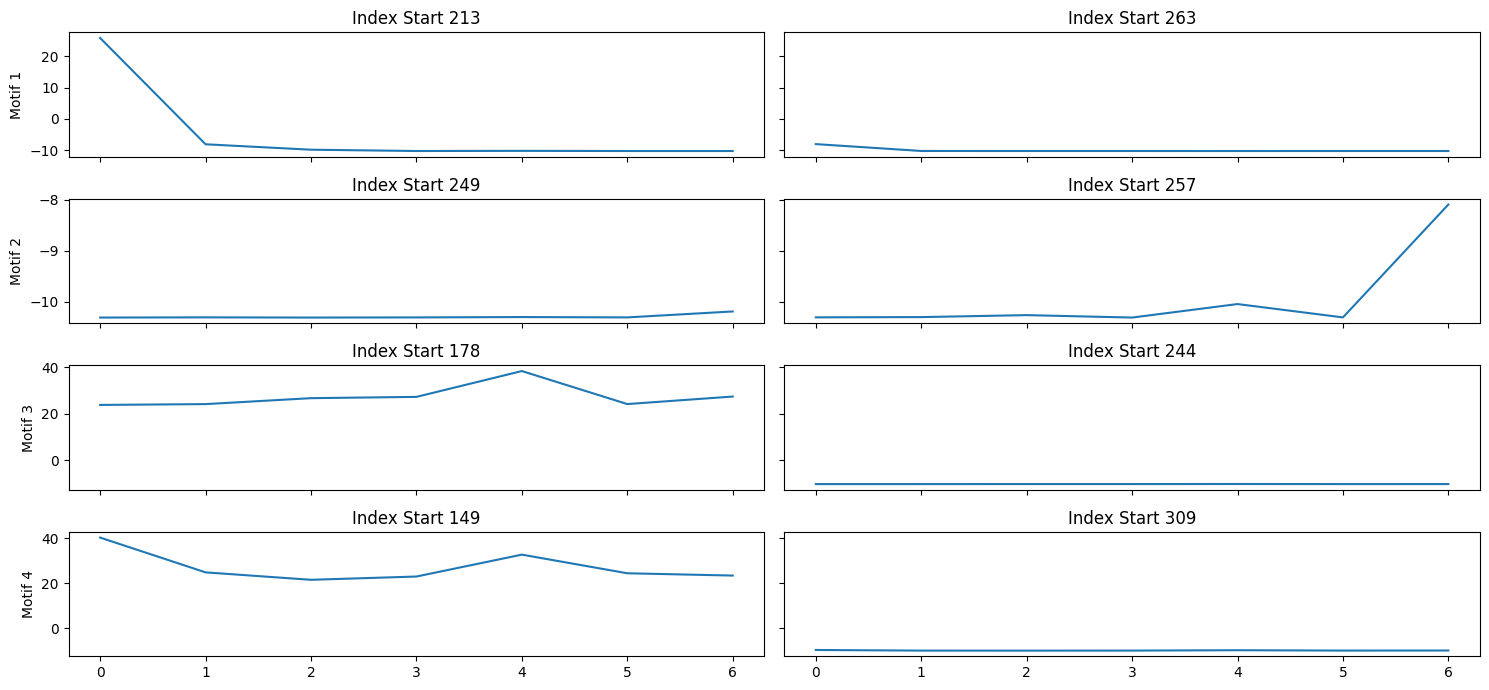

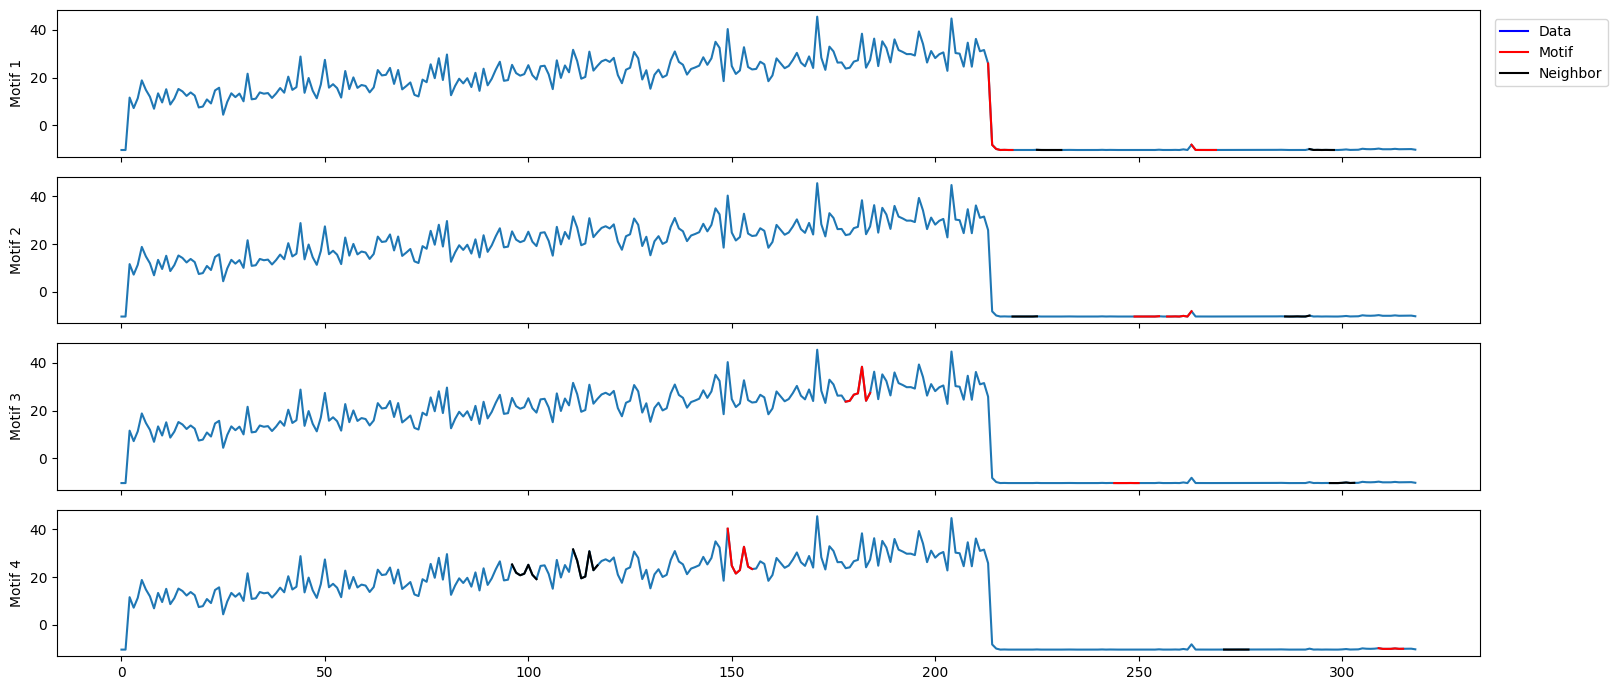

In [27]:
window_size = 7
profile = mp.algorithms.stomp(avg_nonbot, window_size)
motif = mp.discover.motifs(profile, k=4, max_neighbors=3)
mp.visualize(motif)

# Montly motif discovery (REAL USERS)

[<Figure size 1500x700 with 5 Axes>,
 <Figure size 1500x700 with 8 Axes>,
 <Figure size 1500x700 with 4 Axes>]

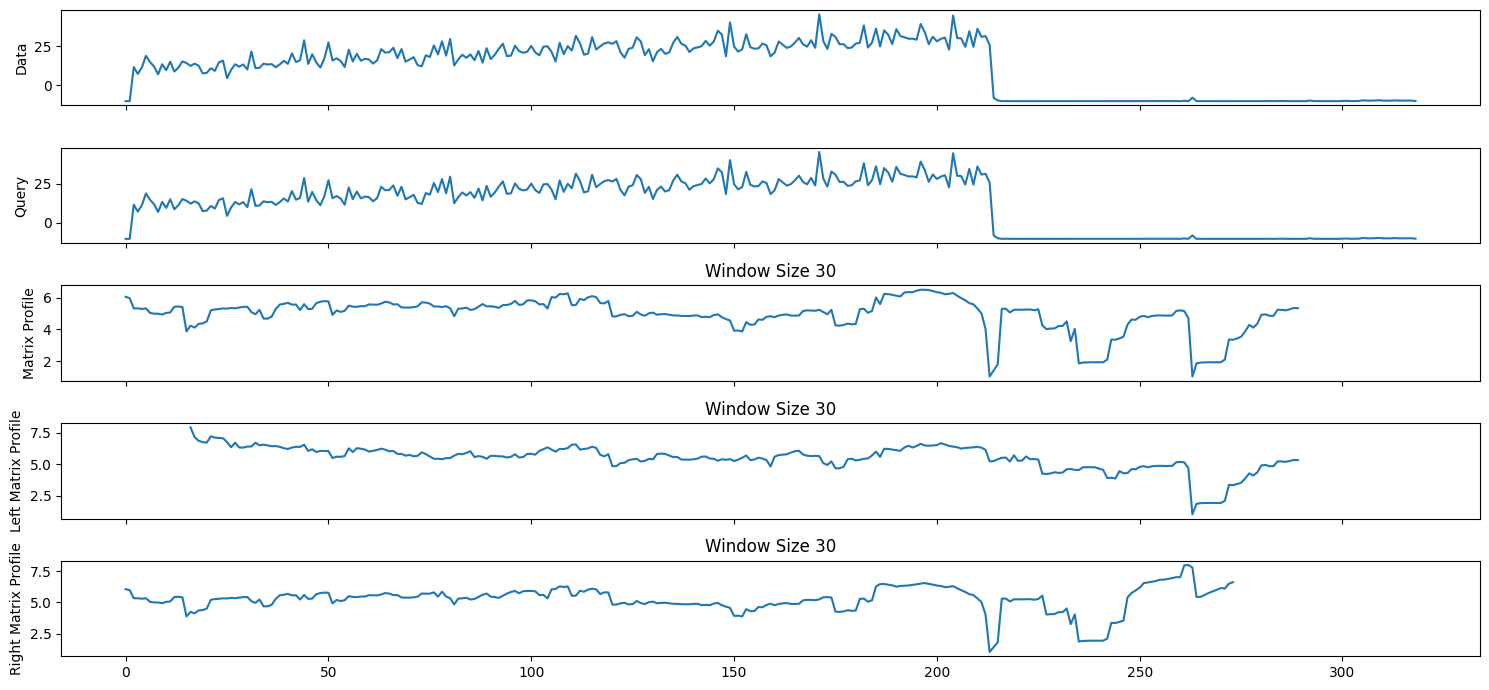

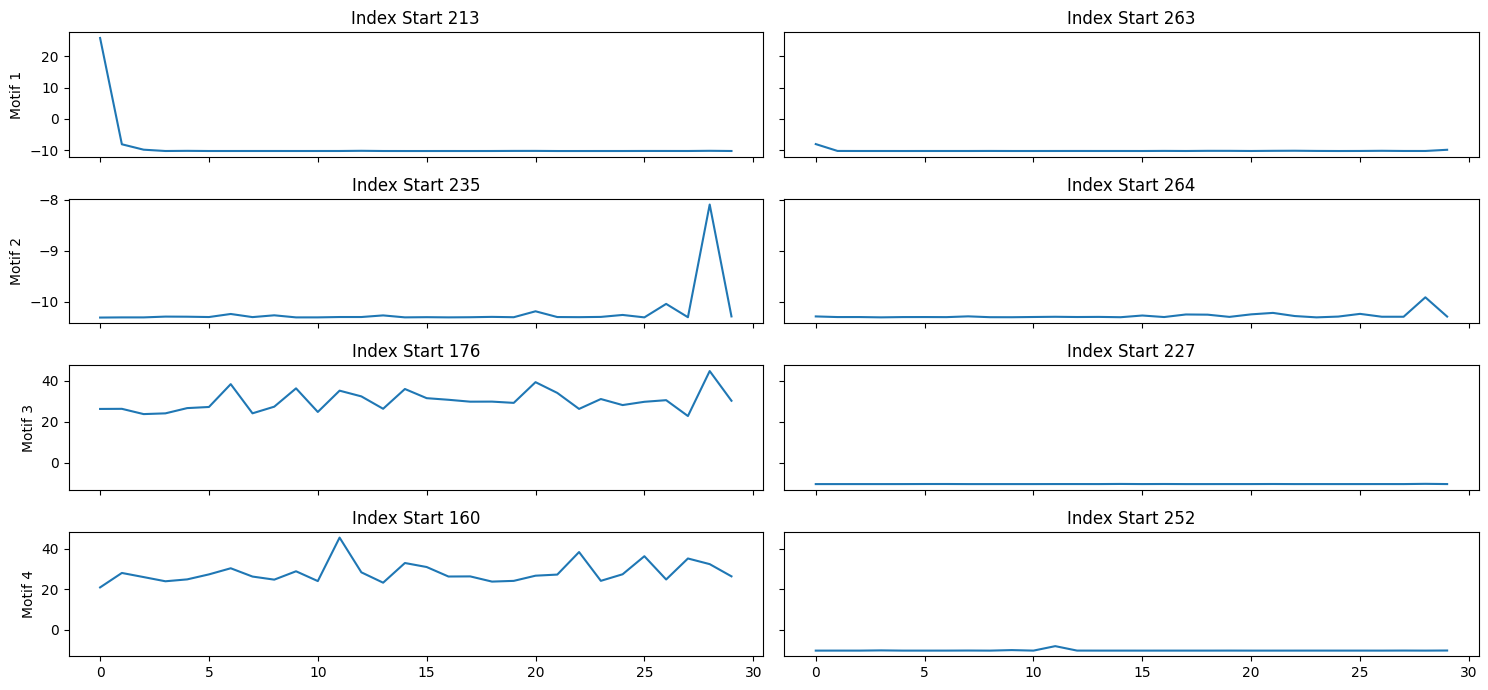

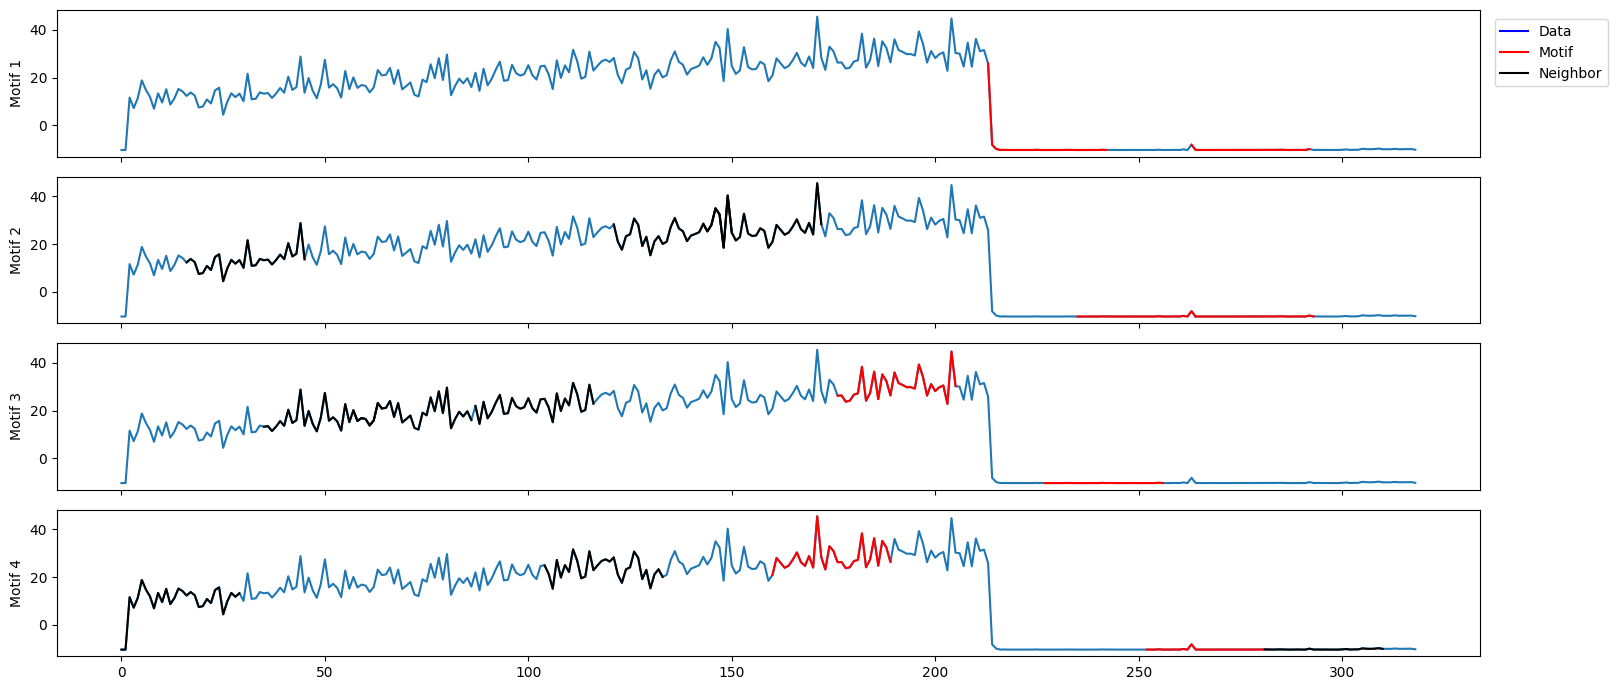

In [28]:
window_size = 30
profile = mp.algorithms.stomp(avg_nonbot, window_size)
motif = mp.discover.motifs(profile, k=4, max_neighbors=3)
mp.visualize(motif)